Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


<ipython-input-4-89b941be2f6a>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


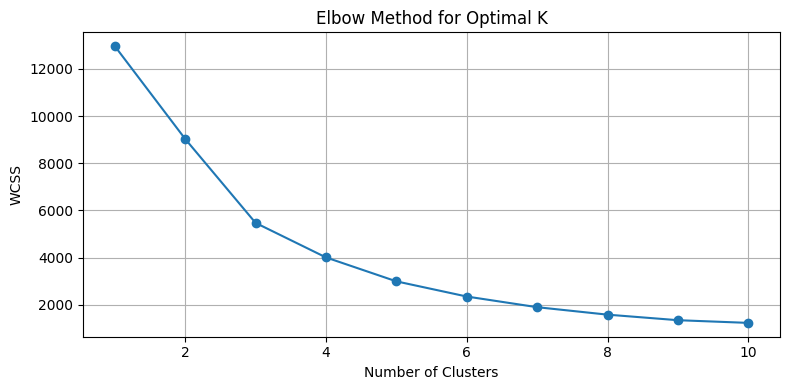

   Cluster     Recency  Frequency       Monetary  Count
0        0   40.137405   4.818702    1487.377625   3144
1        1  243.889831   1.838041     485.190255   1062
2        2    6.666667  89.000000  182181.981667      6
3        3    8.181818  40.672727   18441.961455    110


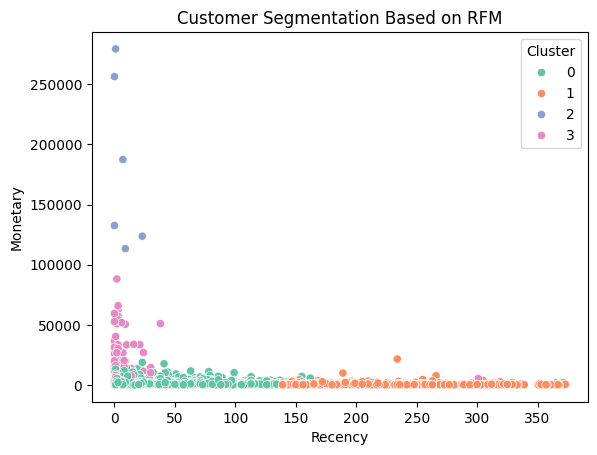

In [4]:
# STEP 1: Upload the file manually
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# STEP 3: Load the dataset (change the filename if needed)
df = pd.read_csv("9. Customer Segmentation in E-commerce.csv", encoding='ISO-8859-1')

# STEP 4: Clean and prepare the data
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# STEP 5: RFM calculation
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]

# STEP 6: Normalize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# STEP 7: Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Apply KMeans with chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# STEP 9: View cluster summary
summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()
print(summary)

# STEP 10: Visualize clusters
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Customer Segmentation Based on RFM")
plt.show()
